In [23]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

orders=pd.read_csv("/content/drive/MyDrive/olist_orders_dataset.csv")
order_items=pd.read_csv("/content/drive/MyDrive/olist_order_items_dataset.csv")
customers=pd.read_csv("/content/drive/MyDrive/olist_customers_dataset.csv")
products=pd.read_csv("/content/drive/MyDrive/olist_products_dataset.csv")

merged=pd.merge(orders,order_items,how="inner")
merged=pd.merge(merged,customers,how="inner")
merged=pd.merge(merged,products,how="inner")
merged.head()



Mounted at /content/drive


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,sao goncalo do amarante,RN,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,santo andre,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [3]:
merged.info()
merged.columns=merged.columns.str.strip()
print(merged.columns.tolist())
print(merged.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [4]:
print(merged.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
dtype: int64

In [5]:
date_cols=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','order_purchase_timestamp']
merged[date_cols]=merged[date_cols].apply(pd.to_datetime)

In [6]:
order_items['price'] = order_items['price'].astype(float)
order_items['freight_value'] = order_items['freight_value'].astype(float)

In [7]:
merged['order_date'] = merged['order_purchase_timestamp'].dt.date
merged['month'] = merged['order_purchase_timestamp'].dt.to_period('M')
merged['total_price'] = merged['price'] + merged['freight_value']

In [8]:

merged[merged['price'] <= 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_date,month,total_price


In [9]:
import numpy as np
merged.isin([np.inf, -np.inf]).sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [10]:
duplicates = merged[merged.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [11]:
merged[['product_name_lenght','product_description_lenght','product_photos_qty']] = (
    merged[['product_name_lenght','product_description_lenght','product_photos_qty']].fillna(0))
merged['product_category_name'] = merged['product_category_name'].fillna('Unknown')

In [12]:
merged = merged.dropna(subset=['product_weight_g','product_length_cm','product_height_cm','product_width_cm'])


In [13]:
invalid_dates = merged[merged['order_delivered_customer_date'] < merged['order_purchase_timestamp']]
len(invalid_dates)

0

Daily Trend

<Axes: title={'center': 'Daily Sales Trend'}, xlabel='order_date'>

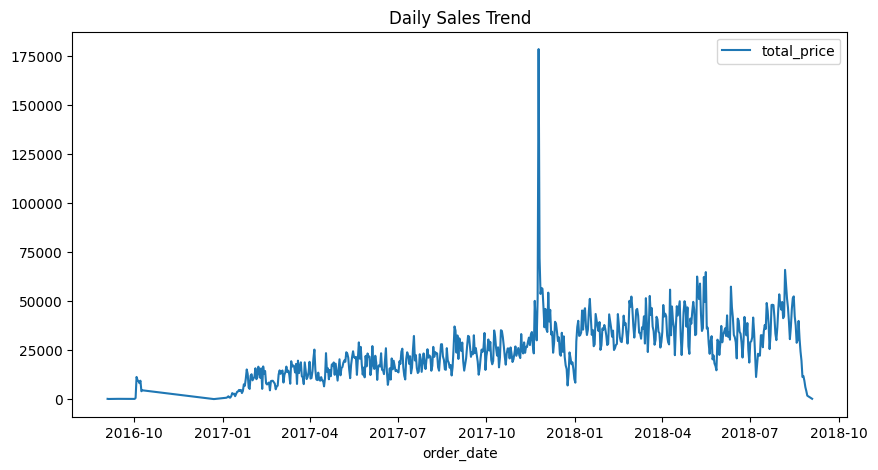

In [14]:
daily_sales = (
    merged.groupby('order_date')['total_price']
    .sum()
    .reset_index()
    .sort_values('order_date')
)

daily_sales.plot(x='order_date', y='total_price', kind='line', figsize=(10,5), title='Daily Sales Trend')


Overall Trend

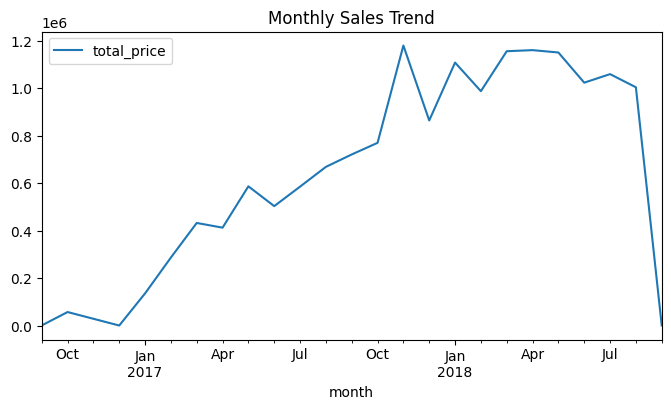

In [15]:
monthly_sales = (
    merged.groupby('month')['total_price']
    .sum()
    .reset_index()
    .sort_values('month')
)

monthly_sales.plot(x='month', y='total_price', kind='line', figsize=(8,4), title='Monthly Sales Trend')
monthly_sales['month'] = monthly_sales['month'].astype(str)


<Axes: title={'center': 'Top 10 Product Categories by Revenue'}, xlabel='product_category_name'>

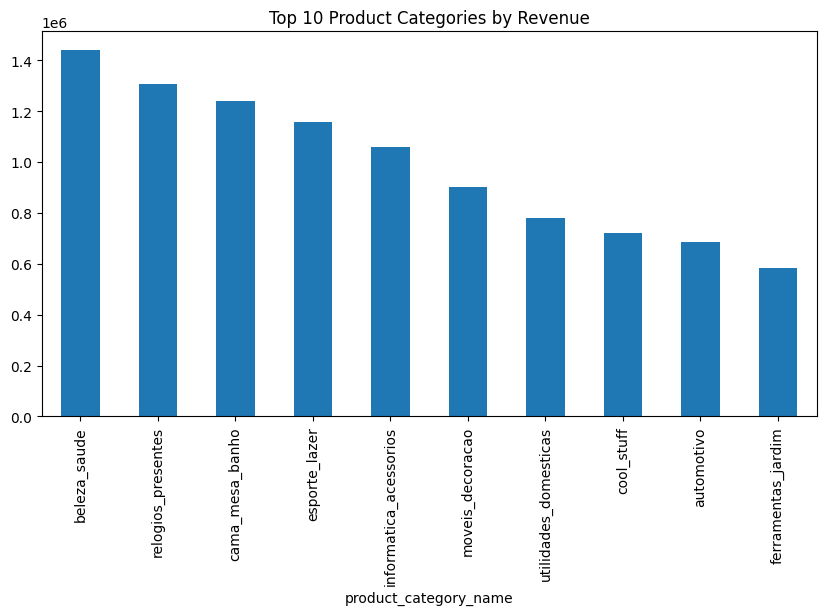

In [16]:
category_sales = (
    merged.groupby('product_category_name')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

category_sales.plot(kind='bar', figsize=(10,5), title='Top 10 Product Categories by Revenue')


<Axes: title={'center': 'Revenue by State'}, xlabel='customer_state'>

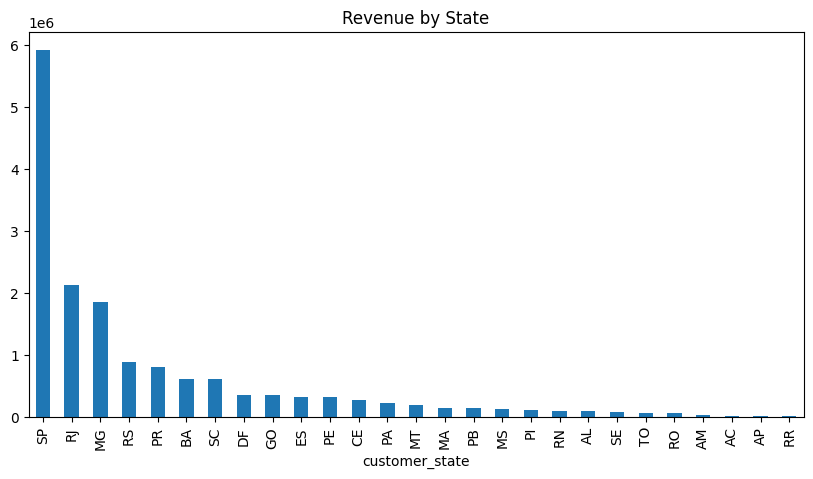

In [17]:
state_sales = (
    merged.groupby('customer_state')['total_price']
    .sum()
    .sort_values(ascending=False)
)

state_sales.plot(kind='bar', figsize=(10,5), title='Revenue by State')


<Axes: title={'center': 'Order Status Distribution'}, xlabel='order_status'>

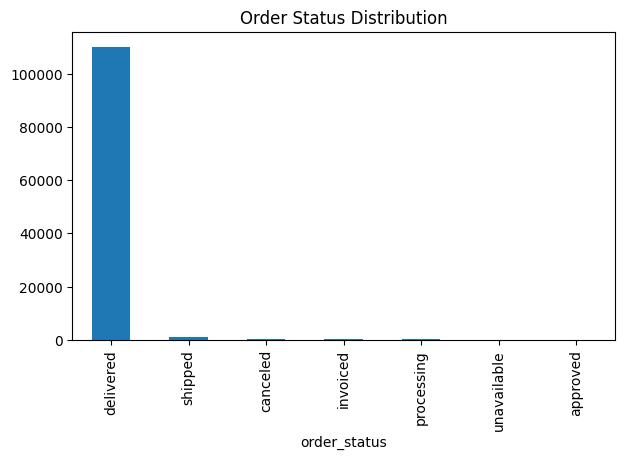

In [18]:
status_counts = merged['order_status'].value_counts()
status_counts.plot(kind='bar', figsize=(7,4), title='Order Status Distribution')


<Axes: title={'center': 'Top 10 Customers by Revenue'}, xlabel='customer_unique_id'>

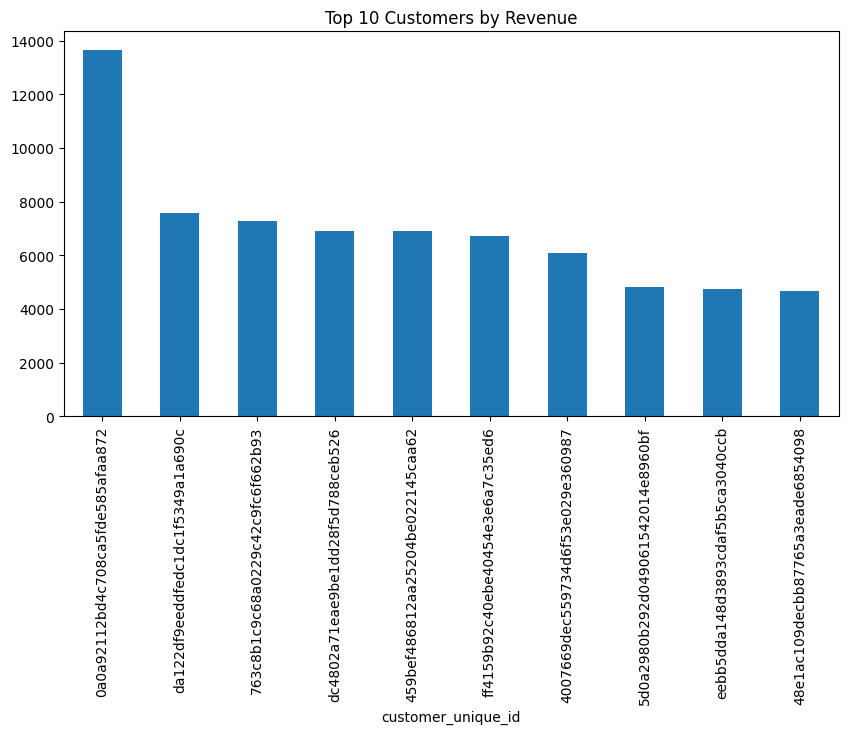

In [19]:
top_customers = (
    merged.groupby('customer_unique_id')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers.plot(kind='bar', figsize=(10,5), title='Top 10 Customers by Revenue')


<Axes: title={'center': 'Top 10 Products by Revenue'}, xlabel='product_id'>

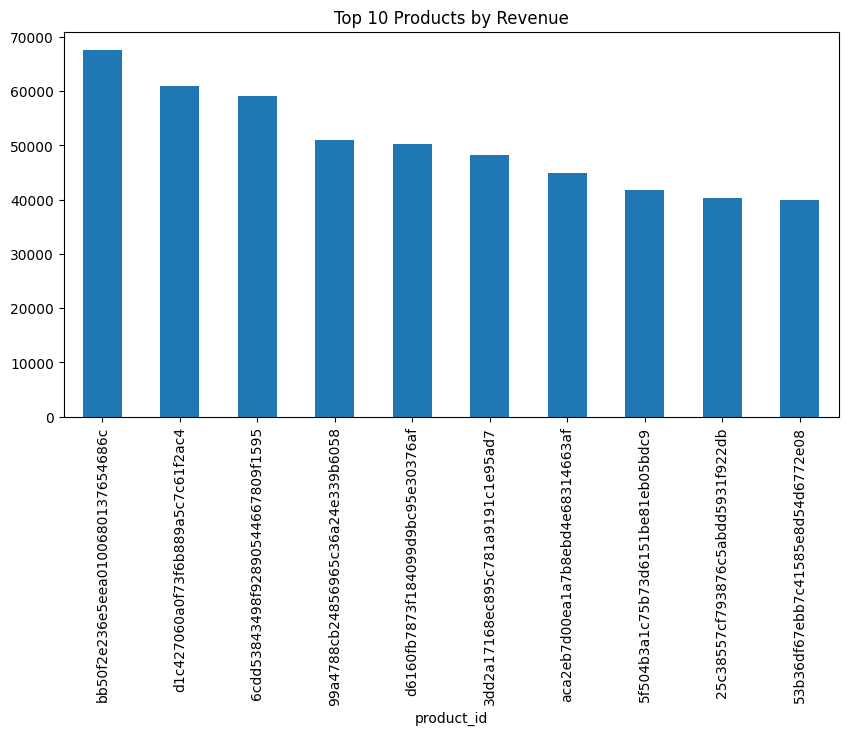

In [20]:
top_products = (
    merged.groupby('product_id')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Products by Revenue')


In [21]:
category_region_sales = (
    merged.groupby(['customer_state', 'product_category_name'])['total_price']
    .sum()
    .reset_index()
)

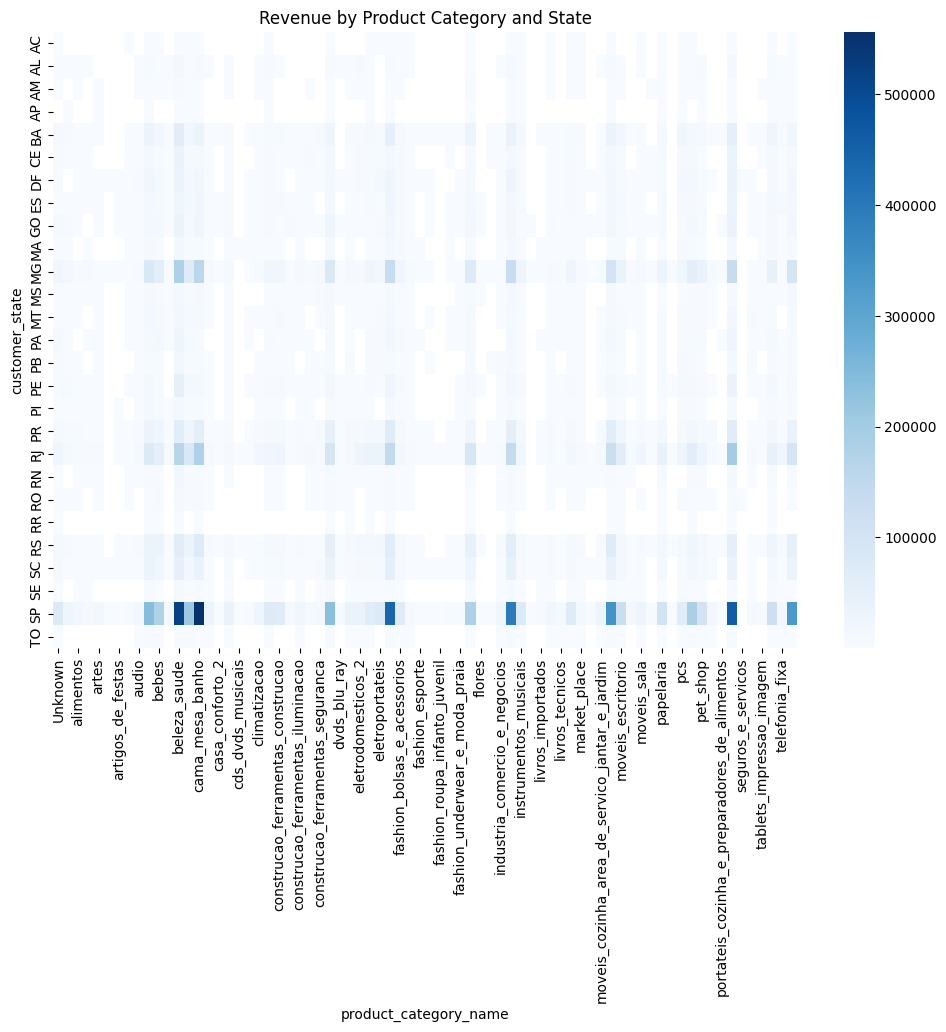

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = category_region_sales.pivot(index='customer_state', columns='product_category_name', values='total_price')
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='Blues')
plt.title('Revenue by Product Category and State')
plt.show()


In [24]:
merged['delivery_time'] = (merged['order_delivered_customer_date'] - merged['order_purchase_timestamp']).dt.days
merged['delivery_time'].describe()



,delivery_time
count,110178.000000
mean,12.007660
std,9.451672
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,209.000000


In [26]:
merged['late_delivery'] = merged['order_delivered_customer_date'] > merged['order_estimated_delivery_date']
print(merged['late_delivery'].value_counts())

late_delivery
False    103917
True       8715
Name: count, dtype: int64


In [30]:
customer_orders = merged.groupby('customer_unique_id')['order_id'].nunique()
print(customer_orders.describe())



count    95407.000000
mean         1.033991
std          0.211179
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: order_id, dtype: float64


In [32]:
!pip install mlxtend


In [37]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

rules = rules.sort_values(by='lift', ascending=False)
rules.head(10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Anamoly Detection

In [38]:
import pandas as pd
import numpy as np


merged['price'] = pd.to_numeric(merged['price'], errors='coerce')
merged['freight_value'] = pd.to_numeric(merged['freight_value'], errors='coerce')
merged['delivery_time'] = (merged['order_delivered_customer_date'] - merged['order_purchase_timestamp']).dt.days


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [39]:
Q1 = merged['price'].quantile(0.25)
Q3 = merged['price'].quantile(0.75)
IQR = Q3 - Q1

outliers_price = merged[(merged['price'] < (Q1 - 1.5 * IQR)) | (merged['price'] > (Q3 + 1.5 * IQR))]
print("Outlier count (price):", outliers_price.shape[0])


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Outlier count (price): 8426


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [44]:
from sklearn.ensemble import IsolationForest

features = merged[['price', 'freight_value', 'delivery_time']].dropna()

model = IsolationForest(contamination=0.02, random_state=42)
predictions = model.fit_predict(features)

merged.loc[features.index, 'anomaly'] = predictions

merged['anomaly'] = merged['anomaly'].fillna(1)


print("Anomaly counts:")
print(merged['anomaly'].value_counts())


anomalies = merged[merged['anomaly'] == -1]
print("\nDetected anomalies:")
print(anomalies.head())

print(f"\nTotal anomalies detected: {anomalies.shape[0]}")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Anomaly counts:
anomaly
 1.0    110428
-1.0      2204
Name: count, dtype: int64

Detected anomalies:
                             order_id                       customer_id  \
17   403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
291  f31535f21d145b2345e2bf7f09d62322  ed532487db04478dfba09d112649fc13   
318  3a830ecb5338f0ff69822d388b64822e  f8c3d249c98f91b25409df45d4a095e3   
346  f04bfdbef5359607d39e66fccc9cc0de  ddbd5d378c4a0981ba1ef29fb8e40b8f   
349  f04bfdbef5359607d39e66fccc9cc0de  ddbd5d378c4a0981ba1ef29fb8e40b8f   

    order_status order_purchase_timestamp   order_approved_at  \
17     delivered      2018-01-02 19:00:43 2018-01-02 19:09:04   
291    delivered      2018-02-01 07:47:34 2018-02-01 08:10:31   
318    delivered      2018-01-24 11:40:28 2018-01-24 15:08:06   
346    delivered      2017-09-13 15:07:45 2017-09-13 15:25:15   
349    delivered      2017-09-13 15:07:45 2017-09-13 15:25:15   

    order_delivered_carrier_date order_delivered_customer

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

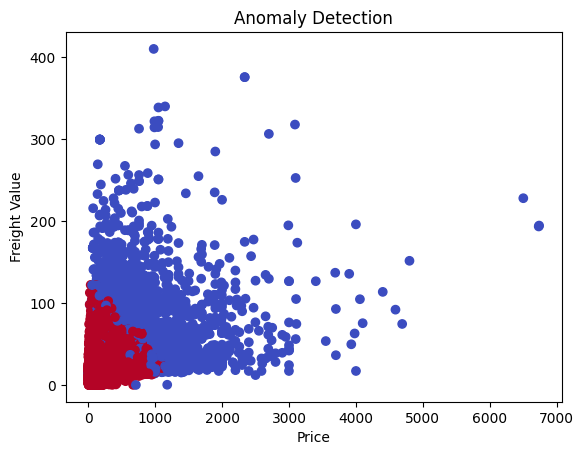

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [43]:
import matplotlib.pyplot as plt

plt.scatter(merged['price'], merged['freight_value'], c=merged['anomaly'], cmap='coolwarm')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.title('Anomaly Detection')
plt.show()
